#Problem Statement
In the world of music, there are many factors that influence what we like and dislike. Some songs are so easy to dance to, whereas some songs are made for making you feel relaxed and calm. Understanding these factors is often challenging as every song can be interpretted differently thus, the goal is to figure out what makes a song appealing or unappealing.

The challenge is understanding how attributes like danceability, the acousticness or the energy of the song relate to whether someone likes a song or not. So, knowing which combinations of attributes make songs resonate with listeners and how these attributes work together to create feelings. By figuring this out, we can learn more about why we enjoy the music we do.

The objective is to streamline computational processes by reducing the dimensionality of the data while retaining crucial information, thereby determining which song features or attributes play a significant role in predicting individual liking or disliking of songs. This problem statement seeks to optimize model efficiency and interpretability by leveraging dimensionality reduction techniques to uncover essential characteristics driving music preferences.

#Dataset Description
The dataset has been sourced from [Kaggle](https://www.kaggle.com/datasets/geomack/spotifyclassification/data). It is a ".csv" file which consists of numerical features, each feature describing a certain attribute of a song, two features storing the name of the song and artist of the song respectively and finally a target storing binary values about a song being liked(1) or disliked(0) by the user, based on attributes of the song. The dataset has been generated by [Spotify's API](https://developer.spotify.com/community) which measure the songs' danceability, mood, liveness and other such features. The dataset consists of 2017 songs (rows) and 15 features (columns) and 1 target column.



##Features of the Dataset

* `acousticness` : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* `danceability` : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* `duration_ms` : The duration of the track in milliseconds.
* `energy` : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, rap songs have high energy, while a pop song scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* `instrumentalness` : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. This helps us differentiate between songs which have lyrics and songs which just have music.
* `key` : The key the track is in. Integers map to pitches using standard Pitch Class notation. There are 12 different pitches in music so this feature is categorical having integer values ranging from 0 to 11. Each number represents a different pitch. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
* `liveness` : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* `loudness` : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
* `mode` : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. Happy songs usually have a Major melody (mode=1) whereas Sad songs usually have a Minor melody (mode=0).
* `speechiness` : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* `tempo` : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* `time_signature` : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* `valence` : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* `song_title`: Name (title) of the song.
* `artist`: Artist(s) who created the song.
* `target`: Target to predict (binary values: 0 or 1), whether the song is liked by the user(1) or disliked by the user(0).


The values of the above described numerical features have been calculated beforehand by Spotify. This dataset has been generated by accessing the Spotify's API (and then uploaded on Kaggle) and they have not specified what formula or what calculations have they performed to generate these numerical values of each feature.

##Why Dimensionality Reduction
Dimensionality reduction is a technique used in machine learning to reduce the number of input variables or features in a dataset. The goal is to simplify the dataset while retaining as much important information as possible.

Dimensionality reduction is well-suited for our problem statement due to several reasons:

* `Feature Selection`: With a dataset containing numerous attributes like acousticness, danceability, and tempo, dimensionality reduction helps in selecting the most relevant features. This ensures that the model focuses on the attributes that have the most impact on predicting music preferences, leading to more accurate results.

* `Computational Efficiency`: By reducing the number of dimensions in the dataset, dimensionality reduction techniques like PCA streamline the computational process. This is particularly beneficial when dealing with large datasets, as it reduces the computational burden and speeds up analysis.

* `Interpretability`: Reduced-dimensional representations are often more interpretable than high-dimensional data. This means that the relationships and patterns uncovered by the model are easier to understand and explain, which is crucial for gaining insights into what factors drive music liking or disliking.

Thus, dimensionality reduction can be very helpful for our binary classification task of predicting if the song is liked by the user or disliked by the user.

#Data Preprocessing

In [727]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings

warnings.filterwarnings("ignore")

In [728]:
spotify_data = pd.read_csv("spotify_data.csv")
spotify_data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [729]:
# Dropping the "Unnamed: 0" column
spotify_data.drop("Unnamed: 0", axis=1, inplace=True)
spotify_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [730]:
# Creating another data frame of ONLY numerical and categorical features
df = spotify_data.iloc[:,:14]
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [731]:
# Checking the shape of the data
df.shape

(2017, 14)

In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 220.7 KB


In [733]:
# Renaming the "target" feature for ease of understanding
df = df.rename(columns={'target': "song_liked"})
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_liked
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [734]:
# Checking for NA Values in the dataset
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
song_liked          0
dtype: int64

>There are `0 NA Values` in the dataset

In [735]:
# Analysing the descriptive statistics of the numerical features in the dataset
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_liked
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [736]:
# Checking the minimum and maximum values of the numerical features to see if we can scale the data or not
df.describe().loc[["min", "max"],:]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_liked
min,0.000003,0.122,16042.0,0.0148,0.000,0.0,0.0188,-33.097,0.0,0.0231,47.859,1.0,0.0348,0.0
max,0.995000,0.984,1004627.0,0.9980,0.976,11.0,0.9690,-0.307,1.0,0.8160,219.331,5.0,0.9920,1.0


>Features like `key`, `mode`, `duration_ms`, `loudness` `tempo` and `time_signature` cannot be scaled because:
* `key` and `mode`: These are categorical features which tell us about the music theory behind the song. These features cannot be scaled.
* `duration_ms`, `tempo` and `time_signature`: These are numerical features which tell us about the duration and the beats or the tempo of the song. These features again cannot be scaled.
* `loudness`: This feature cannot be scaled as it is calculated in decibels (dB) which is a physical quantity of loudness. Thus scaling these values would change the levels of loudness (change the values in dB) and hence scaling would only change the loudness of a particular song.
* Thus, the above features can be dropped from the dataset as these contribute less to predicting if the user will like the song or not, we can get a detailed analysis of the user's preference by using other features present in the dataset while saving computation power by dropping features which would contribute less to arriving at a solution for our problem statement.
* The remaining features can be readily used without scaling, for classification tasks as they all lie in the range of 0 to 1 and scaling is not required for these features.


In [737]:
# Feature Selection
df.drop(["key", "mode", "duration_ms", "loudness", "tempo", "time_signature", "loudness"], axis=1, inplace=True)
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,song_liked
0,0.0102,0.833,0.434,0.021900,0.1650,0.4310,0.286,1
1,0.1990,0.743,0.359,0.006110,0.1370,0.0794,0.588,1
2,0.0344,0.838,0.412,0.000234,0.1590,0.2890,0.173,1
3,0.6040,0.494,0.338,0.510000,0.0922,0.0261,0.230,1
4,0.1800,0.678,0.561,0.512000,0.4390,0.0694,0.904,1


>Thus, we have 7 features upon which we can perform dimensionality reduction techniques to make the model focus on the attributes that have the most impact on predicting music preferences, leading to more accurate results.

#Exploratory Data Analysis

In [738]:
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,song_liked
0,0.0102,0.833,0.434,0.021900,0.1650,0.4310,0.286,1
1,0.1990,0.743,0.359,0.006110,0.1370,0.0794,0.588,1
2,0.0344,0.838,0.412,0.000234,0.1590,0.2890,0.173,1
3,0.6040,0.494,0.338,0.510000,0.0922,0.0261,0.230,1
4,0.1800,0.678,0.561,0.512000,0.4390,0.0694,0.904,1


##**Analysis**: To check what type of songs are frequent in the dataset

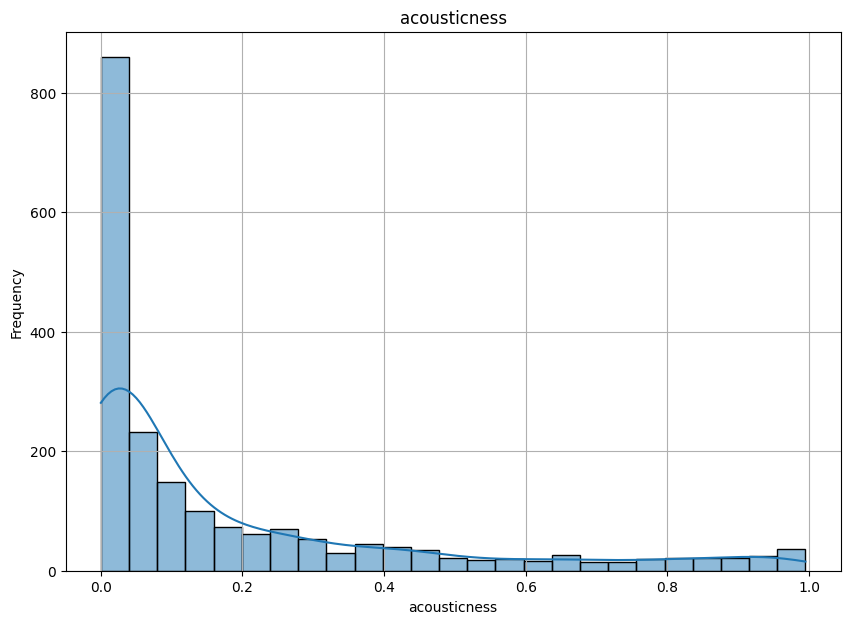

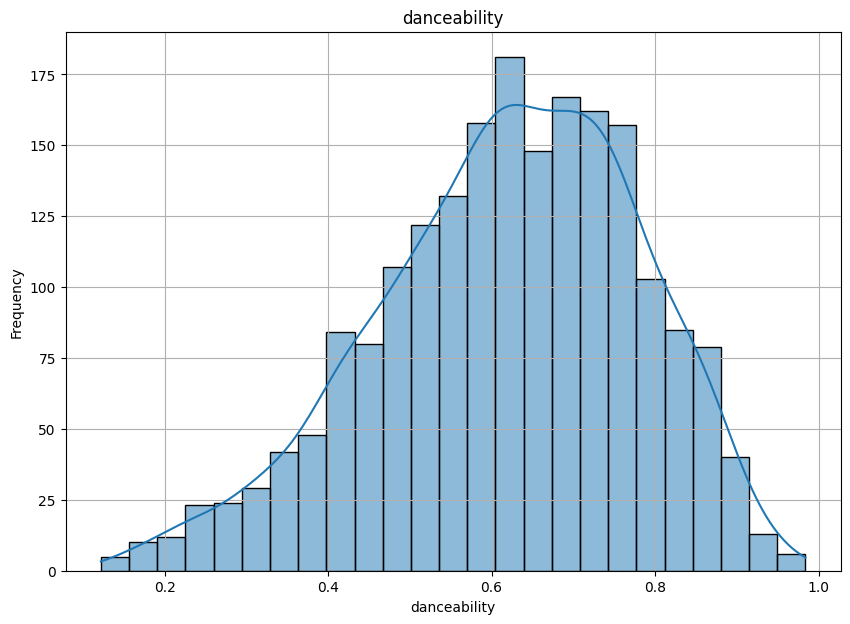

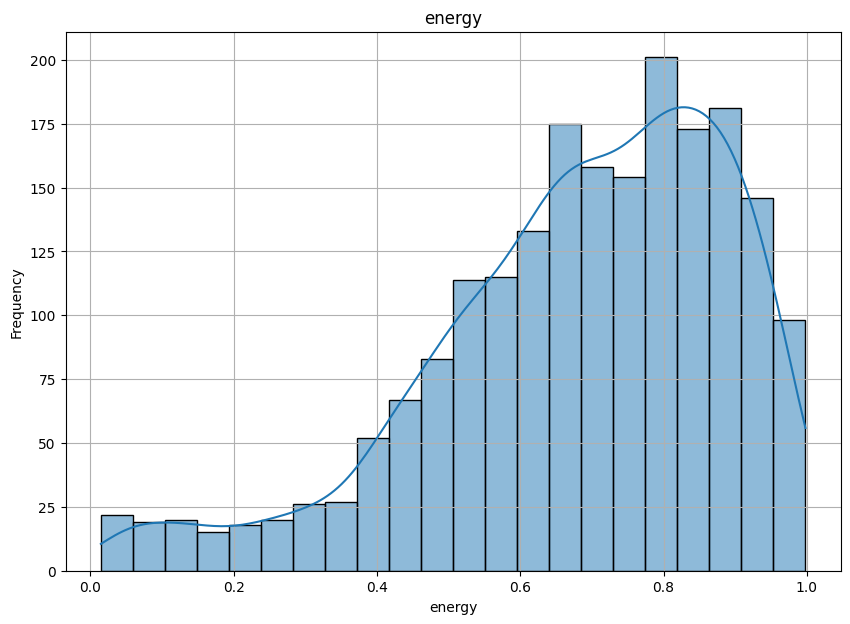

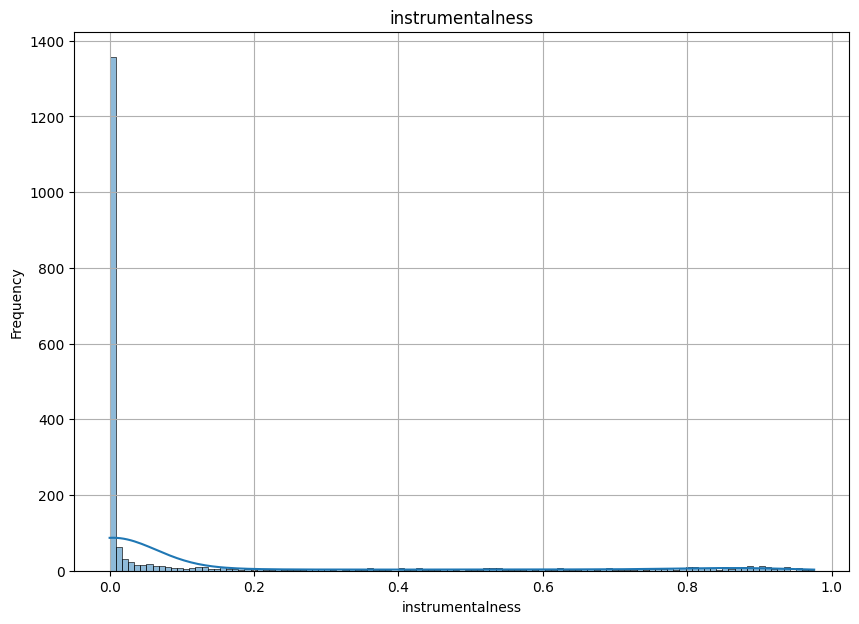

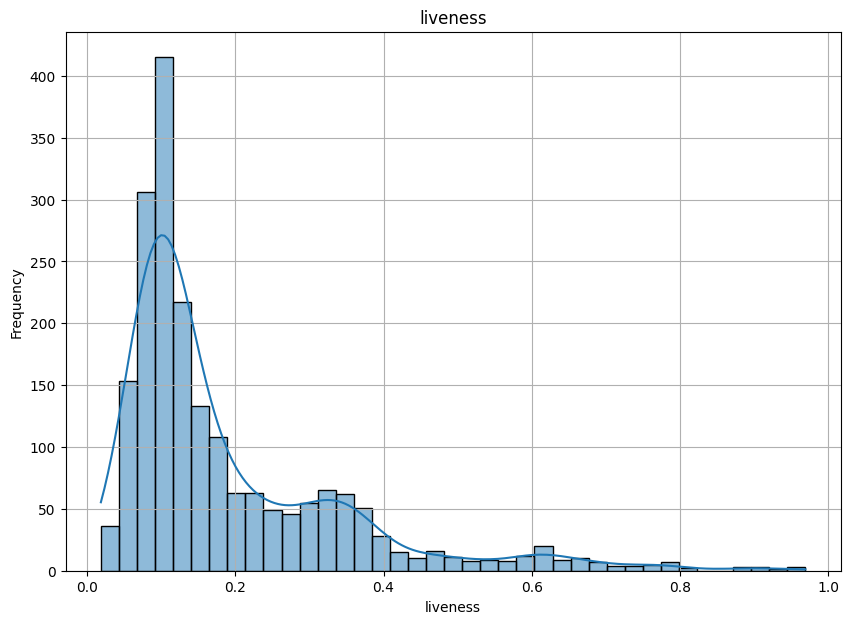

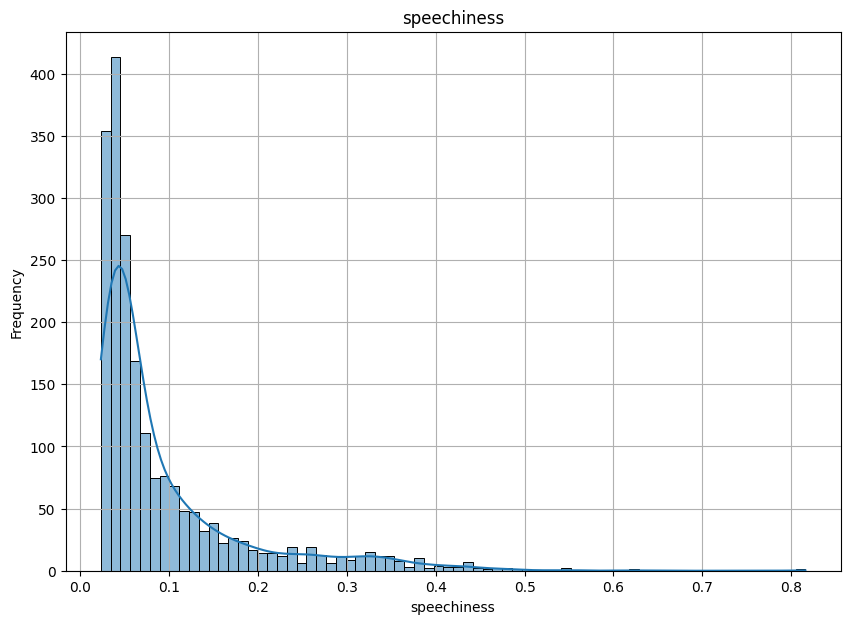

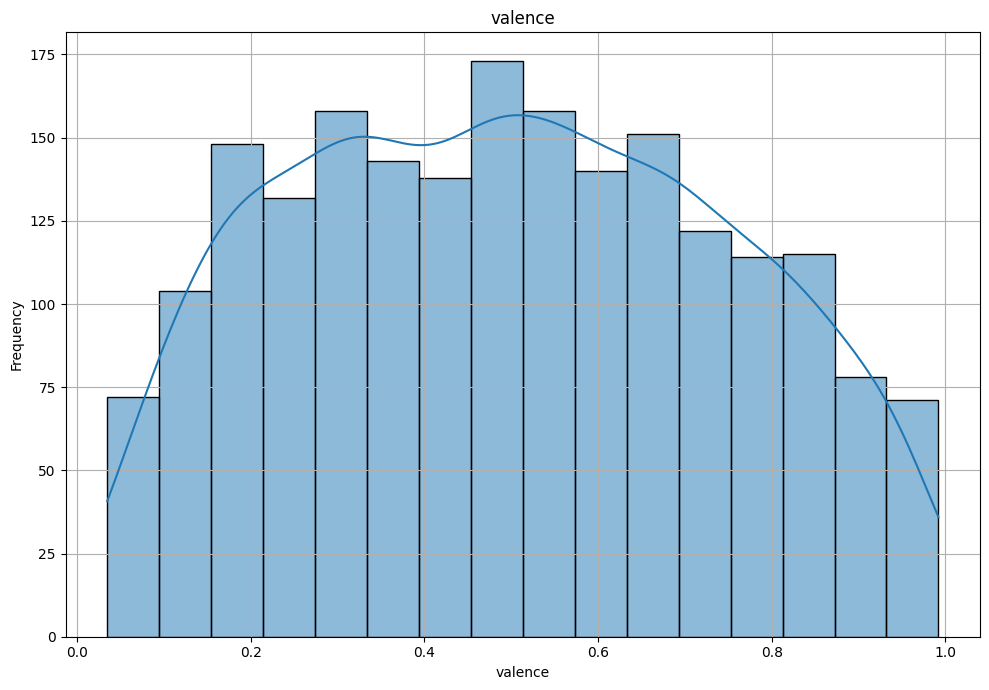

In [739]:
# Histograms with Kernel Distribution Estimation (KDE) Plots
for i in range(7):
  plt.figure(figsize=(10,7))
  sns.histplot(df.iloc[:,i], kde="true")
  plt.title(f"{df.columns[i]}")
  plt.xlabel(f"{df.columns[i]}")
  plt.ylabel("Frequency")
  plt.grid()

plt.tight_layout()
plt.show()

>**INFERENCE**: From the above Histogram plots, we can infer that:
* `acousticness`: most of the values are less than 0.5, which means that most of the songs are not acoustic, they may be rap, rock or any other genre of music.
* `danceability`: most of the values are more than or equal to 0.5, which means most of the songs are songs on which the user can dance on.
* `energy`: the plot is left-skewed which means most of the songs have high-energy, and would make the user feel energetic.
* `instrumentalness`: most of the values are near 0, which means most of the songs are not instrumental, they have lyrics or speech in it, very few songs are instrumental (songs having just music) in this dataset.
* `liveness`: most of the values are closer to 0, which means most of the songs in the dataset have not been recorded live, rather they are recorded in studios.
* `speechiness`: again, most of the values are closer to 0, which means there are very few songs which have "speech" in addition to lyrics and music. In order words, there are very few songs in which the artist or the band is speaking something along with singing the lyrics of the song.
* `valence`: this plot is quite symmetric about the middle point, which means the dataset has "almost" an equal number happy/motivating songs as well as sad/melancholic songs.

##**Analysis**: To check the correlation between various attributes of a song

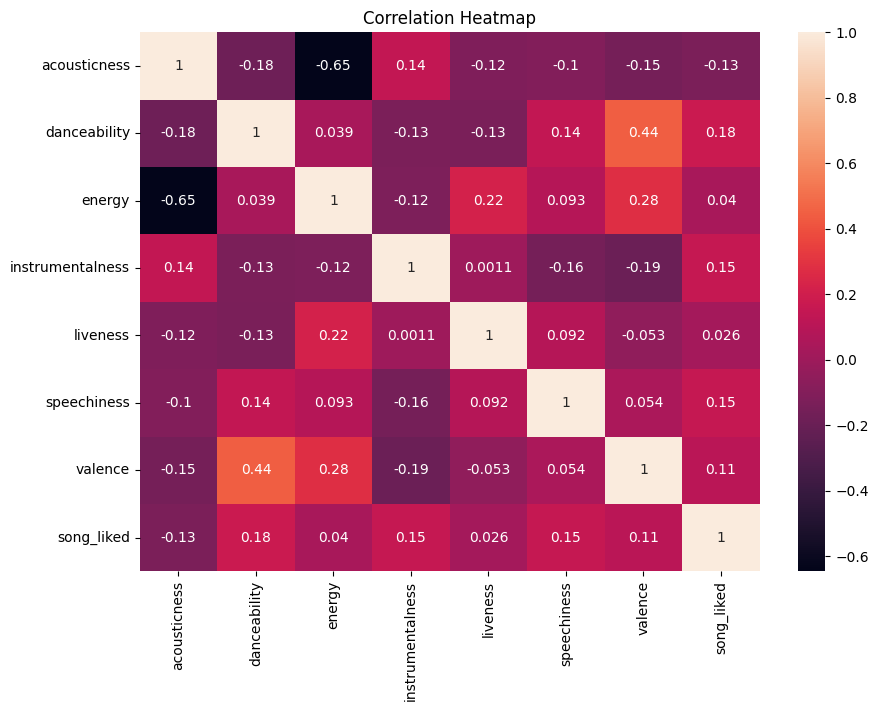

In [740]:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

>**INFERENCE**: From the above analysis of Pearson's correlation coefficients:
* The features `danceability` and `valence` have a 0.44 correlation which the best amongst all the combinations of features. A correlation of 0.44 (closer to 0.5) means the feature have a fairly strong positive correlation.
* On the other hand, the features `acousticness` and `energy` have strong negative correlation, this is because songs which are acoustic, are usually slow and calming, thus their energy would be low which explains the negative correlation between the two featues.
* The rest of the features have either weak positive correlation or weak negative correlation.

##**Analysis**: To check the joint distribution of `danceability` and `energy` to analyze song preference

<Figure size 1000x700 with 0 Axes>

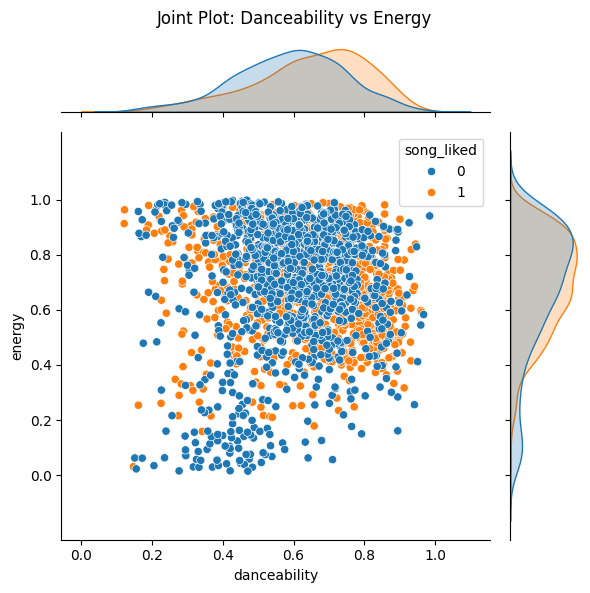

In [741]:
# Joint Plot
plt.figure(figsize=(10,7))
sns.jointplot(x='danceability', y='energy', data=df, hue='song_liked', kind='scatter')
plt.suptitle('Joint Plot: Danceability vs Energy')
plt.xticks()
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.tight_layout()
plt.show()

>**INFERENCE**: The joint plot helps us analyse if there is a specific region where class 0 dominates class 1 or vice versa but from the above plot, we can observe both the classes are well-distributed throughout the space. Also, most of the data points are concentrated between the energy of 0.5 and 1 and danceability of 0.4 and 1.0, this means most of the songs are of high energy and are songs on which users can dance as well.

##**Analysis**: To categorize songs based on mood

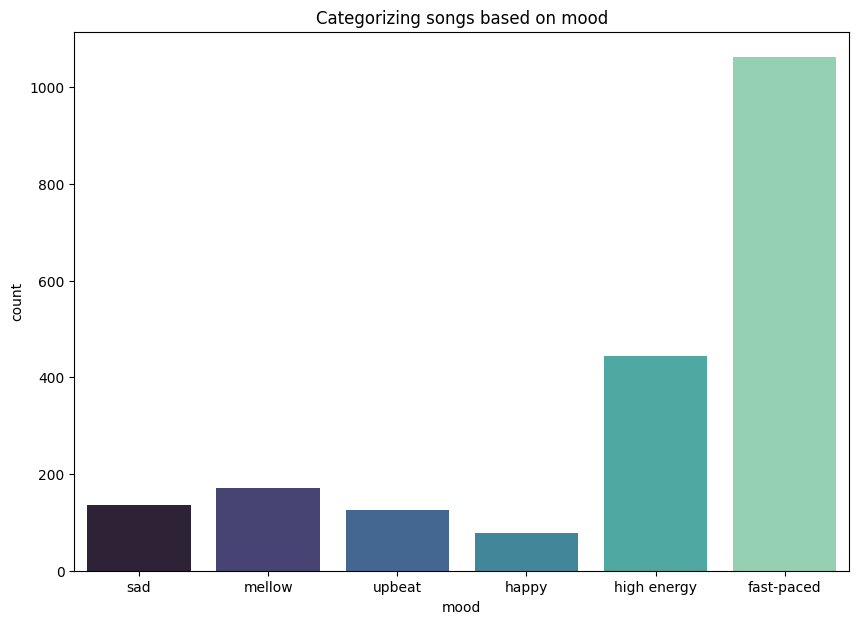

In [742]:
# Define categories for the mood variable
categories = ['sad', 'mellow', 'upbeat', 'happy', 'high energy', 'fast-paced']

# Create a categorical variable for the overall mood of the song based on conditions
spotify_data['mood'] = 'sad'
spotify_data.loc[spotify_data['valence'] > 0.25, 'mood'] = 'mellow'
spotify_data.loc[spotify_data['valence'] > 0.5, 'mood'] = 'upbeat'
spotify_data.loc[spotify_data['valence'] > 0.75, 'mood'] = 'happy'
spotify_data.loc[spotify_data['energy'] >= 0.7, 'mood'] = 'high energy'
spotify_data.loc[spotify_data['tempo'] >= 120, 'mood'] = 'fast-paced'

# Plot the value counts of each mood category
plt.figure(figsize=(10,7))
sns.countplot(data=spotify_data, x='mood', palette="mako", order=categories)
plt.title("Categorizing songs based on mood")
plt.show()

>**INFERENCE**: `Fast-Paced` songs are the most common type of songs there are, in the dataset. Thus, most of the songs would have high energy and high danceability as well. This gives us a further clarity about what do the numbers of each of the numerical features like energy, convey to us.

##**Analysis**: To check class labels distribution of our dataset

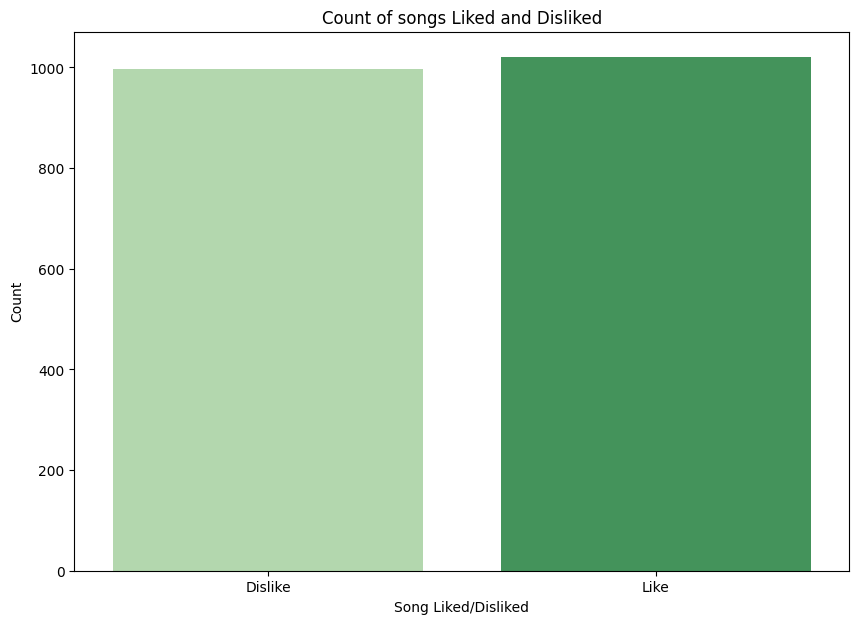

In [743]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="song_liked", palette="Greens")
plt.xticks(ticks=[0,1], labels=["Dislike", "Like"])
plt.xlabel("Song Liked/Disliked")
plt.ylabel("Count")
plt.title("Count of songs Liked and Disliked")
plt.show()

>**INFERENCE**: From the above plot, we can see there is almost an equal count of both the classes (Songs disliked and Songs liked) so the dataset has a balance of both the classes which makes it easier for our model to generalize patterns in our data.

##**Analysis**: To visualize the high-dimensional data into lower-dimensional space using t-SNE
t-SNE (t-Distributed Stochastic Neighbor Embedding) is a powerful dimensionality reduction technique widely used for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D. Unlike linear methods like PCA, t-SNE focuses on capturing local similarities between data points, making it particularly effective for revealing intricate structures the dataset.


In [744]:
# Separate features and target variable
X = df.drop("song_liked", axis=1)
y = df["song_liked"]

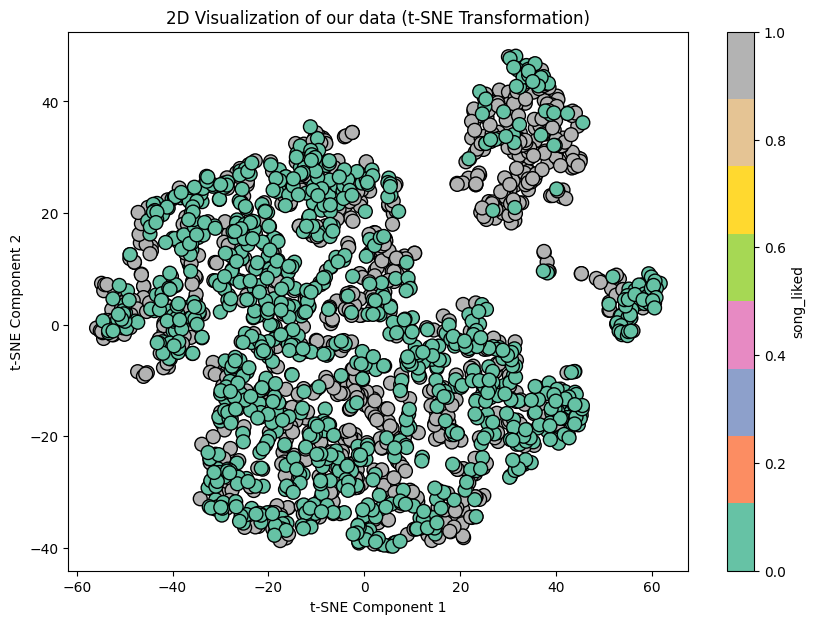

In [745]:
# Apply t-SNE for 2 components
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plotting t-SNE-transformed data
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Set2', marker='o', edgecolor='k', s=100)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D Visualization of our data (t-SNE Transformation)')
plt.colorbar(label='song_liked')
plt.show()

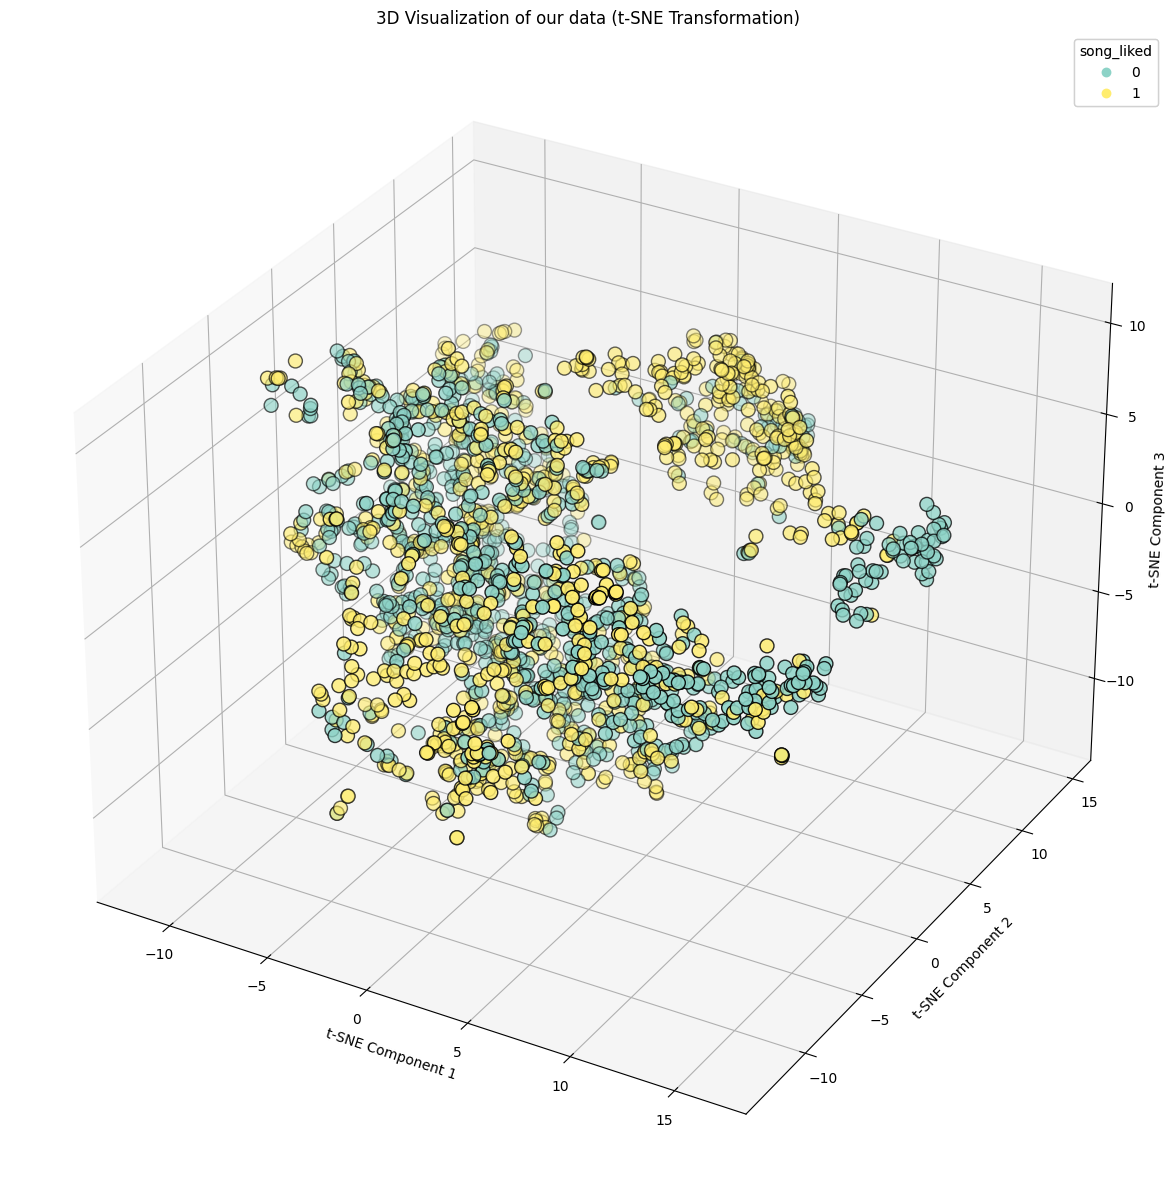

In [746]:
# Apply t-SNE for 3 components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plotting 3D t-SNE-transformed data
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='Set3', marker='o', edgecolor='k', s=100)

# Set labels and title
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D Visualization of our data (t-SNE Transformation)')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title='song_liked')
ax.add_artist(legend1)

plt.show()

#Dimensionality Reduction

##Splitting Data into Train and Test sets

In [747]:
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,song_liked
0,0.0102,0.833,0.434,0.021900,0.1650,0.4310,0.286,1
1,0.1990,0.743,0.359,0.006110,0.1370,0.0794,0.588,1
2,0.0344,0.838,0.412,0.000234,0.1590,0.2890,0.173,1
3,0.6040,0.494,0.338,0.510000,0.0922,0.0261,0.230,1
4,0.1800,0.678,0.561,0.512000,0.4390,0.0694,0.904,1


In [748]:
X = df.drop("song_liked", axis=1) # Feature vectors for our model
y = df["song_liked"] # Target vector for our model

In [749]:
# Splitting original data into train and test datasets - 80% training set, 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [750]:
# Checking lengths of each set
len(X_train), len(y_train), len(X_test), len(y_test)

(1613, 1613, 404, 404)

##Original Dataset (Without Dimensionality Reduction)
Analyis on the Original Dataset will be used to compare how much of the information is retained on applying Dimensionality Reduction techniques and how accurately model predicts on dimensionally reduced datasets.

In [751]:
# Fitting the Decision Tree Classifier on the training set
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [752]:
# Predicting on Testing Set
y_pred = model.predict(X_test)

In [753]:
# Evaluating the accuracy
accuracy_org =accuracy_score(y_test, y_pred)*100
print(f"Accuracy of our model on the original dataset : {accuracy_org:.4f} %")

Accuracy of our model on the original dataset : 74.5050 %


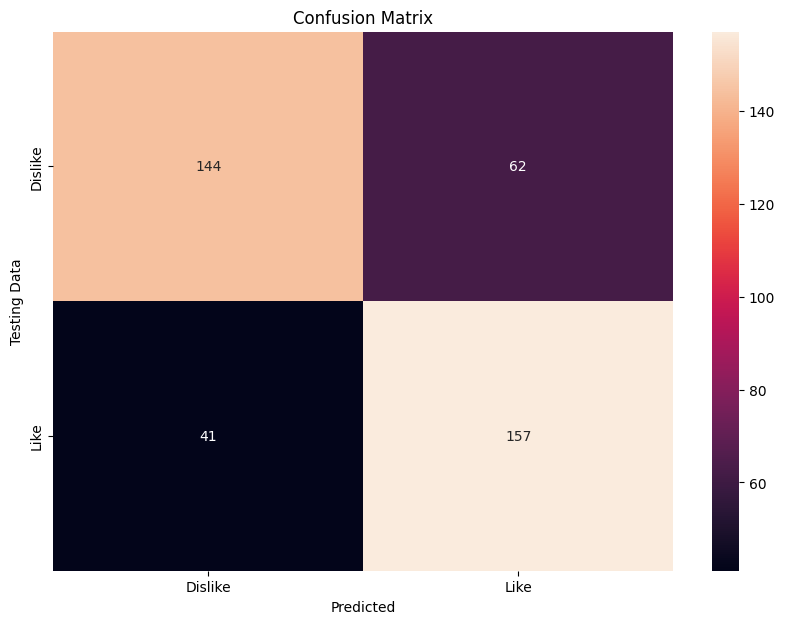

In [754]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=['Dislike','Like'], yticklabels=['Dislike','Like'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Testing Data', fontsize=10)
plt.show()

In [755]:
# Calculating the precision, recall and f1-score
precision_org = precision_score(y_test, y_pred)
recall_org = recall_score(y_test, y_pred)
f1_score_org = f1_score(y_test, y_pred)

In [756]:
# Plotting the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       206
           1       0.72      0.79      0.75       198

    accuracy                           0.75       404
   macro avg       0.75      0.75      0.74       404
weighted avg       0.75      0.75      0.74       404



##Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique widely used in machine learning. It works by transforming a high-dimensional dataset into a lower-dimensional space while retaining as much variance as possible.

PCA identifies the directions, known as principal components, that capture the maximum variance in the data, allowing for the creation of a more compact and interpretable representation. By reducing the number of dimensions, PCA helps in visualizing data, mitigating the curse of dimensionality, and improving computational efficiency.

In [757]:
# Get the covariance matrix
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[ 6.75944152e-02, -7.53142064e-03, -3.53334301e-02,
         1.02549632e-02, -4.73379753e-03, -2.33562391e-03,
        -9.78335092e-03],
       [-7.53142064e-03,  2.59303283e-02,  1.30553192e-03,
        -5.74299381e-03, -3.30537498e-03,  2.06594847e-03,
         1.75965117e-02],
       [-3.53334301e-02,  1.30553192e-03,  4.42147383e-02,
        -7.05860516e-03,  7.10742406e-03,  1.76057970e-03,
         1.44699484e-02],
       [ 1.02549632e-02, -5.74299381e-03, -7.05860516e-03,
         7.46175761e-02,  4.51487828e-05, -3.81627671e-03,
        -1.31423105e-02],
       [-4.73379753e-03, -3.30537498e-03,  7.10742406e-03,
         4.51487828e-05,  2.41656865e-02,  1.29180470e-03,
        -2.03705482e-03],
       [-2.33562391e-03,  2.06594847e-03,  1.76057970e-03,
        -3.81627671e-03,  1.29180470e-03,  8.08766830e-03,
         1.20977133e-03],
       [-9.78335092e-03,  1.75965117e-02,  1.44699484e-02,
        -1.31423105e-02, -2.03705482e-03,  1.20977133e-03,
         6.1105599

In [758]:
# Computing the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues, eigenvectors

(array([0.11170389, 0.070393  , 0.05623119, 0.02732754, 0.01948202,
        0.01312458, 0.0074538 ]),
 array([[-6.09014845e-01,  4.87192900e-01, -2.14760770e-01,
         -3.96833919e-01,  1.20347810e-01,  4.16073115e-01,
          2.33284632e-02],
        [ 1.76427238e-01,  1.17999507e-01, -3.06880495e-01,
          4.66206674e-01, -5.53256724e-01,  5.57149454e-01,
          1.64063185e-01],
        [ 4.66578904e-01, -3.37308248e-01,  4.49940545e-02,
         -3.97906018e-01,  3.54139475e-01,  6.15918837e-01,
          5.83337477e-02],
        [-4.40190972e-01, -7.41501010e-01, -5.03025480e-01,
          2.35274634e-02, -1.92558120e-02, -4.94220499e-03,
         -4.92419952e-02],
        [ 5.47130993e-02, -1.21870245e-01,  1.22283040e-01,
         -6.47378664e-01, -7.24615778e-01, -1.26636992e-01,
          8.36474148e-02],
        [ 4.70395104e-02,  2.41346208e-02,  2.27626949e-02,
          3.04686391e-05, -1.35193211e-01,  1.46324641e-01,
         -9.78263031e-01],
        [ 4.2579

In [759]:
eigen_pairs = [(np.abs(eigenvalues[i])) for i in range(len(eigenvalues))]
print("Eigenvalues in Decsending order:")
for i in eigen_pairs:
  print(i)

Eigenvalues in Decsending order:
0.11170388843482158
0.0703929983780675
0.05623119460144101
0.02732753951653586
0.01948201649092869
0.01312457556648912
0.007453799536292955


###PCA with `n_components=4`

In [760]:
# Initializing pca with n_components=4 to project our data into 4 dimensions
pca_4 = PCA(n_components=4)
X_new = pca_4.fit_transform(X)

In [761]:
# Explained variance ratio: the proportion of dataset's variance that lies along each principal component
explained_variance_4 = pca_4.explained_variance_ratio_
explained_variance_4

array([0.36538449, 0.23025617, 0.18393278, 0.08938864])

<Axes: xlabel='principal_component', ylabel='variance'>

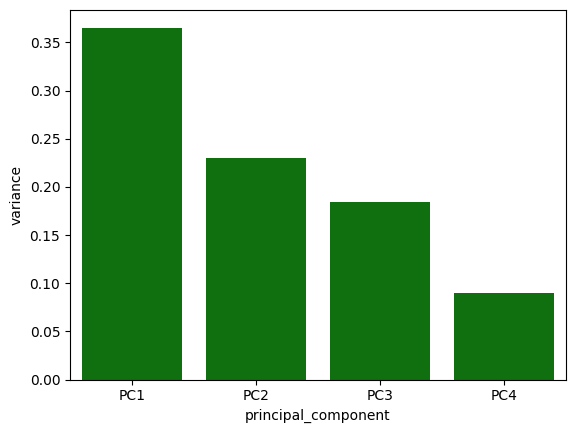

In [762]:
# Visualizing explained variance ratio
data = pd.DataFrame({"variance": explained_variance_4,
                     "principal_component": ["PC1", "PC2", "PC3", "PC4"]})

sns.barplot(x="principal_component", y="variance", data=data, color="g")

>**INFERENCE**: The first principal component has retained the most variance which means it has retained more information than the other three principal components. As the number of principal components increase, the amount of information retained decreases.

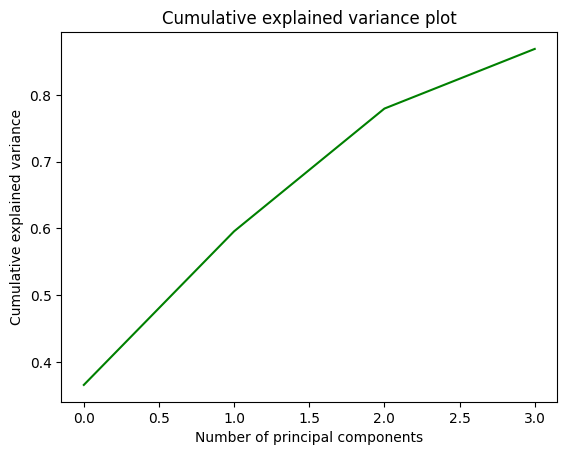

In [763]:
# Plotting the Cumulative explained variance
plt.plot(np.cumsum(explained_variance_4), color="g")
plt.title("Cumulative explained variance plot")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.show()

>**INFERENCE**: With n_components=4, we get a cumulative explained variance of more than 0.8, which means more 80% of the information has been retained after performing dimensionality reduction.

In [764]:
# Creating a pipeline to sequentially apply PCA and then the classifier
pipeline = Pipeline([('pca', pca_4), ('classifier', model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=4)),
                ('classifier', RandomForestClassifier())])

In [765]:
y_pred = pipeline.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [766]:
# Evaluating the accuracy
accuracy_pca_4 =accuracy_score(y_test, y_pred)*100
print(f"Accuracy of our model on PCA with n_components=4 : {accuracy_pca_4:.4f} %")

Accuracy of our model on PCA with n_components=4 : 64.1089 %


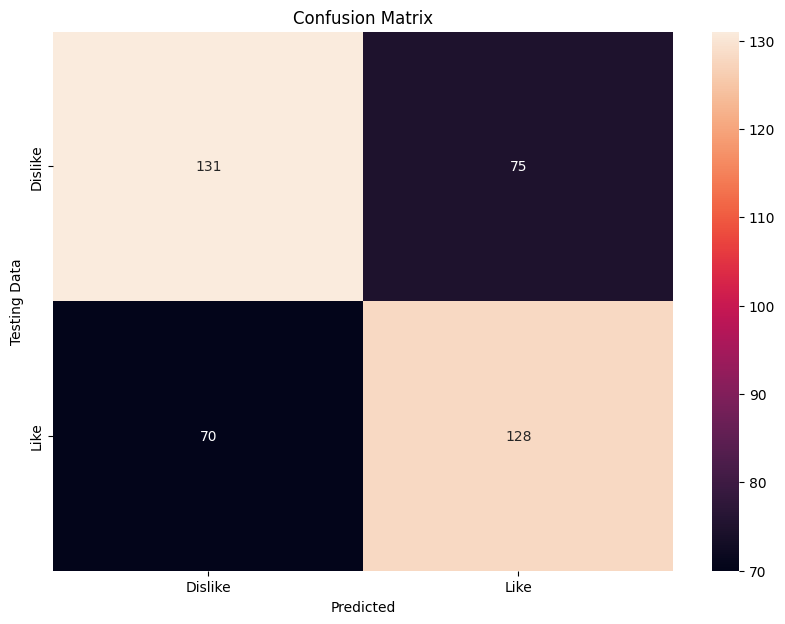

In [767]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=['Dislike','Like'], yticklabels=['Dislike','Like'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Testing Data', fontsize=10)
plt.show()

>**INFERENCE**: On applying PCA, True Positives and True Negatives have decreased as compared to Original Dataset

In [768]:
# Calculating the precision, recall and f1-score
precision_pca_4 = precision_score(y_test, y_pred)
recall_pca_4 = recall_score(y_test, y_pred)
f1_score_pca_4 = f1_score(y_test, y_pred)

In [769]:
# Plotting the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       206
           1       0.63      0.65      0.64       198

    accuracy                           0.64       404
   macro avg       0.64      0.64      0.64       404
weighted avg       0.64      0.64      0.64       404



>**INFERENCE**: There has been a drop in the accuracy of our model. Also, the precision, recall and f1-score have dropped too which means the overall model performance has suffered due to reducing the dimensions.

###PCA with `n_components=3`

In [770]:
# Initializing pca with n_components=3 to project our data into 3 dimensions
pca_3 = PCA(n_components=3)
X_new = pca_3.fit_transform(X)

In [771]:
# Explained variance ratio
explained_variance_3 = pca_3.explained_variance_ratio_
explained_variance_3

array([0.36538449, 0.23025617, 0.18393278])

<Axes: xlabel='principal_component', ylabel='variance'>

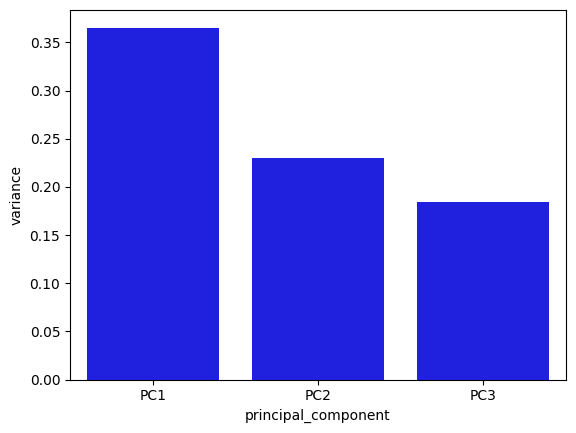

In [772]:
# Visualizing explained variance ratio
data = pd.DataFrame({"variance": explained_variance_3,
                     "principal_component": ["PC1", "PC2", "PC3"]})

sns.barplot(x="principal_component", y="variance", data=data, color="b")

>**INFERENCE**: The first principal component has retained the most variance which means it has retained more information than the other two principal components. As the number of principal components increase, the amount of information retained decreases.

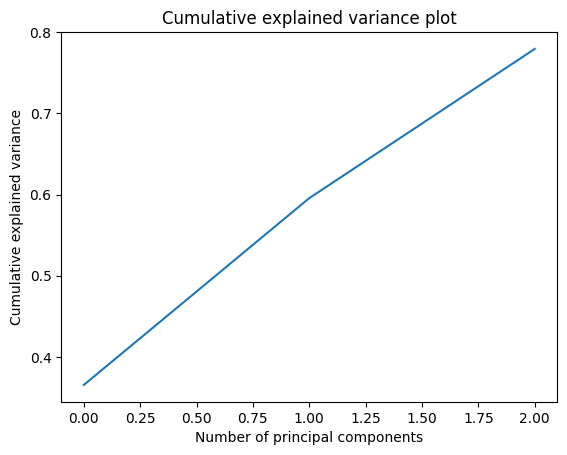

In [773]:
# Plotting the Cumulative explained variance
plt.plot(np.cumsum(explained_variance_3))
plt.title("Cumulative explained variance plot")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.show()

>**INFERENCE**: With n_components=3, we get a cumulative explained variance of approximately 0.8, which approximately 80% of the information has been retained after performing dimensionality reduction.

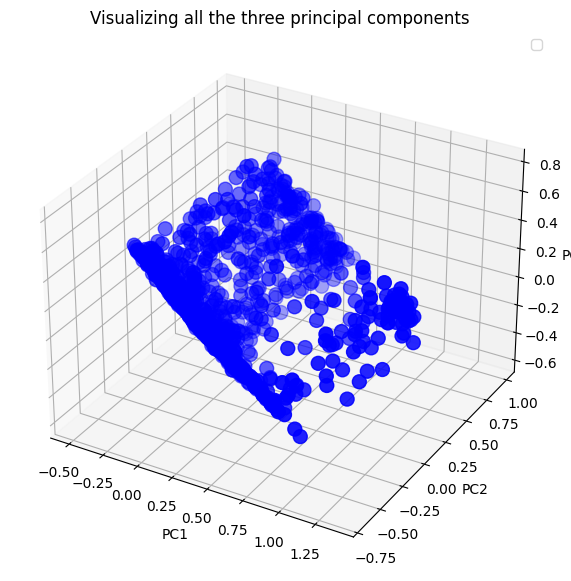

In [774]:
# Create a DataFrame from the PCA components
pca_3_df = pd.DataFrame(X_new, columns=['PC1', 'PC2', 'PC3'])

# Create a 3D scatter plot using Matplotlib
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3_df['PC1'], pca_3_df['PC2'], pca_3_df['PC3'], cmap='Set1', s=100, color="blue")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("Visualizing all the three principal components")
ax.legend(*scatter.legend_elements())
plt.show()

>The above plot is helpful to visualize how our data has been projected in three dimensions.

In [775]:
# Create a pipeline to sequentially apply PCA and then the classifier
pipeline = Pipeline([('pca', pca_3), ('classifier', model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('classifier', RandomForestClassifier())])

In [776]:
y_pred = pipeline.predict(X_test)
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [777]:
# Evaluating the accuracy
accuracy_pca_3 =accuracy_score(y_test, y_pred)*100
print(f"Accuracy of our model on PCA with n_components=3 : {accuracy_pca_3:.4f} %")

Accuracy of our model on PCA with n_components=3 : 57.4257 %


In [778]:
# Calculating the precision, recall and f1-score
precision_pca_3 = precision_score(y_test, y_pred)
recall_pca_3 = recall_score(y_test, y_pred)
f1_score_pca_3 = f1_score(y_test, y_pred)

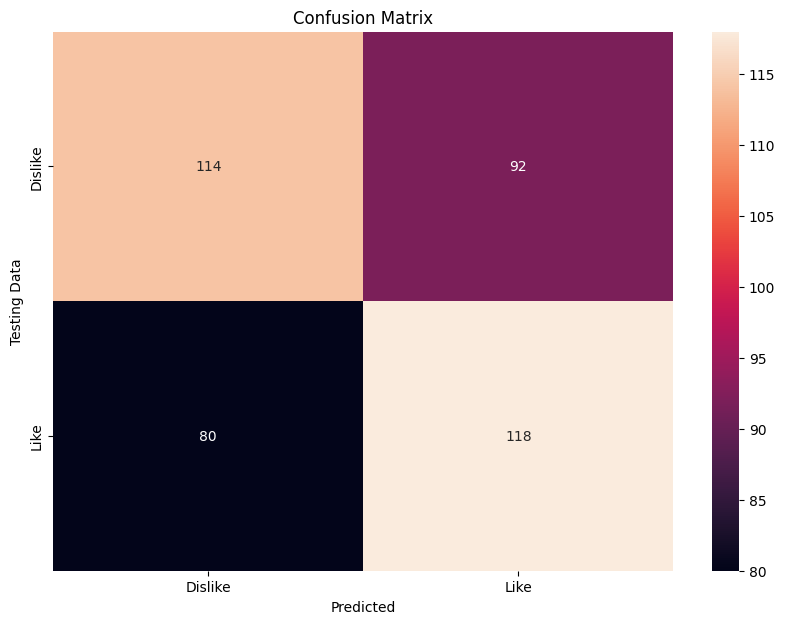

In [779]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=['Dislike','Like'], yticklabels=['Dislike','Like'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Testing Data', fontsize=10)
plt.show()

>**INFERENCE**: On applying PCA, True Positives and True Negatives have decreased as compared to Original Dataset

In [780]:
# Plotting the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       206
           1       0.56      0.60      0.58       198

    accuracy                           0.57       404
   macro avg       0.57      0.57      0.57       404
weighted avg       0.58      0.57      0.57       404



###PCA with `n_components=2`

In [781]:
# Initializing pca with n_components=2 to project our data into 2 dimensions
pca_2 = PCA(n_components=2)
X_new = pca_2.fit_transform(X)

In [782]:
# Explained variance ratio
explained_variance_2 = pca_2.explained_variance_ratio_
explained_variance_2

array([0.36538449, 0.23025617])

<Axes: xlabel='principal_component', ylabel='variance'>

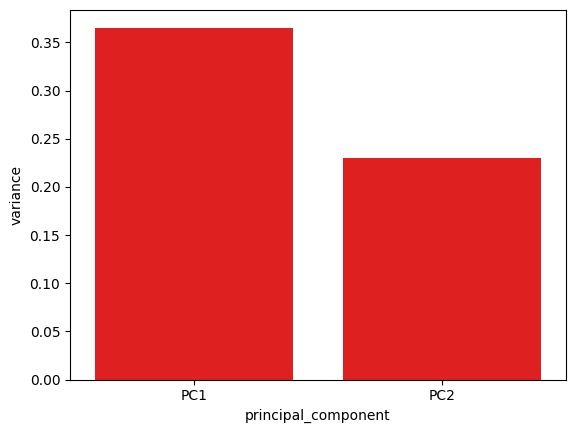

In [783]:
# Visualizing explained variance ratio
data = pd.DataFrame({"variance": explained_variance_2,
                     "principal_component": ["PC1", "PC2"]})

sns.barplot(x="principal_component", y="variance", data=data, color="r")

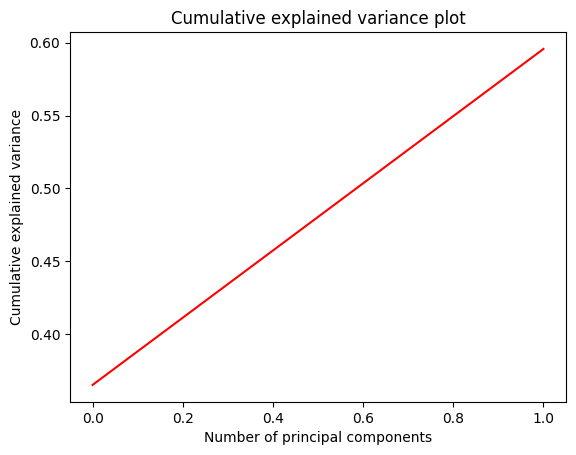

In [784]:
# Plotting the Cumulative explained variance
plt.plot(np.cumsum(explained_variance_2), color="r")
plt.title("Cumulative explained variance plot")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.show()

>>**INFERENCE**: With n_components=2, we get a cumulative explained variance of approximately 0.6, which means approximately 60% of the information has been retained after performing dimensionality reduction.

Text(0, 0.5, 'PC2')

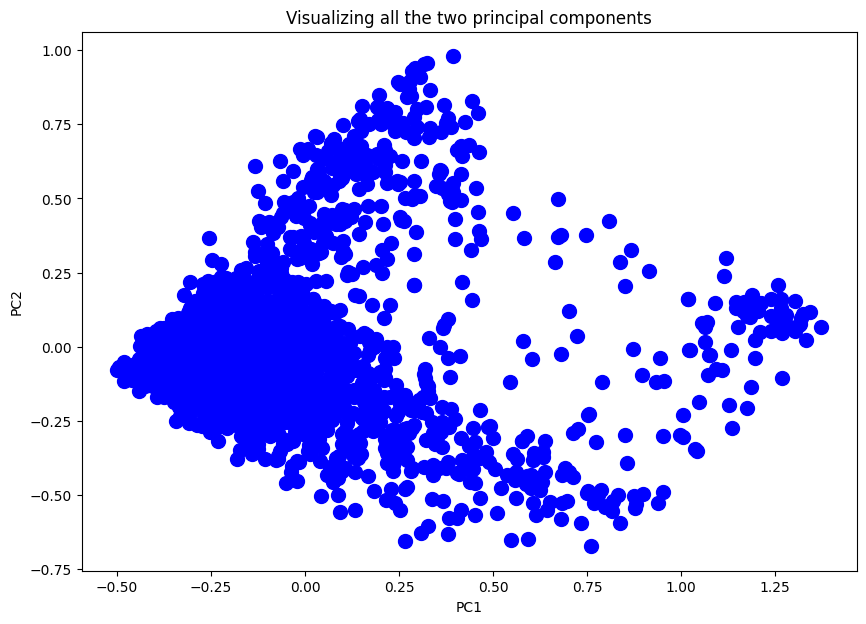

In [785]:
# Create a DataFrame from the PCA components
pca_2_df = pd.DataFrame(X_new, columns=['PC1', 'PC2'])

# Create a 2D scatter plot using Matplotlib
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
scatter = ax.scatter(pca_2_df['PC1'], pca_2_df['PC2'], cmap='Set1', s=100, color="blue")
ax.set_title("Visualizing all the two principal components")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

>The above plot shows the projection of our high-dimensional data on a 2-dimensional space

In [786]:
# Create a pipeline to sequentially apply PCA and then the classifier
pipeline = Pipeline([('pca', pca_2), ('classifier', model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier())])

In [787]:
y_pred = pipeline.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [788]:
# Evaluating the accuracy
accuracy_pca_2 =accuracy_score(y_test, y_pred)*100
print(f"Accuracy of our model on PCA with n_components=2 : {accuracy_pca_2:.4f} %")

Accuracy of our model on PCA with n_components=2 : 56.9307 %


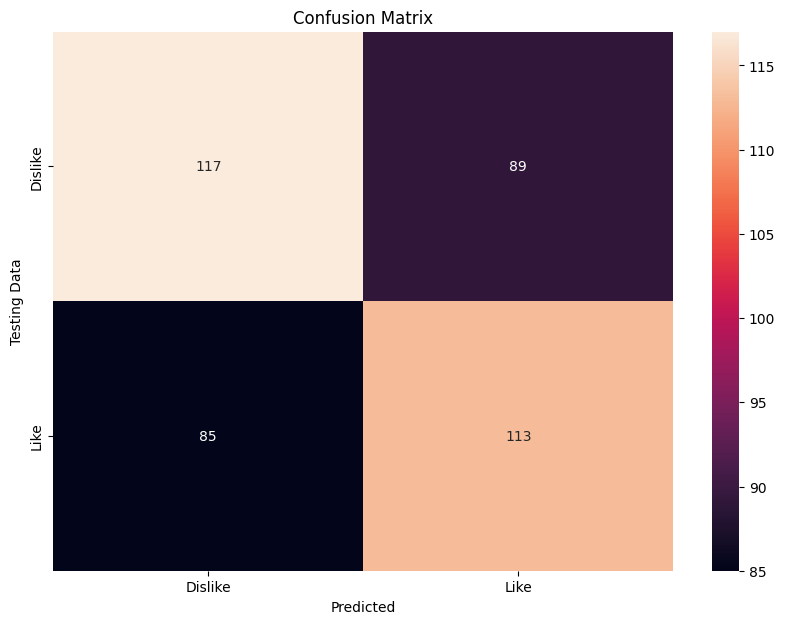

In [789]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=['Dislike','Like'], yticklabels=['Dislike','Like'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Testing Data', fontsize=10)
plt.show()

>**INFERENCE**: On applying PCA, True Positives and True Negatives have decreased as compared to Original Dataset

In [790]:
# Calculating the precision, recall and f1-score
precision_pca_2 = precision_score(y_test, y_pred)
recall_pca_2 = recall_score(y_test, y_pred)
f1_score_pca_2 = f1_score(y_test, y_pred)

In [791]:
# Plotting the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.57      0.57       206
           1       0.56      0.57      0.57       198

    accuracy                           0.57       404
   macro avg       0.57      0.57      0.57       404
weighted avg       0.57      0.57      0.57       404



###Comparing results of PCA with Original Dataset

In [792]:
# Comparing model performance on Original and Dimensionally Reduced Datasets
pca_results_dict = {
    "Original": [accuracy_org/100, precision_org, recall_org, f1_score_org],
    "PC-4": [accuracy_pca_4/100, precision_pca_4, recall_pca_4, f1_score_pca_4],
    "PC-3": [accuracy_pca_3/100, precision_pca_3, recall_pca_3, f1_score_pca_3],
    "PC-2": [accuracy_pca_2/100, precision_pca_2, recall_pca_2, f1_score_pca_2]
}

pca_results_df = pd.DataFrame.from_dict(pca_results_dict, orient="index", columns=["accuracy", "precision", "recall", "f1_score"])
pca_results_df

,accuracy,precision,recall,f1_score
Original,0.745050,0.716895,0.792929,0.752998
PC-4,0.641089,0.630542,0.646465,0.638404
PC-3,0.574257,0.561905,0.595960,0.578431
PC-2,0.569307,0.559406,0.570707,0.565000


>**INFERENCE**: The above data shows how there is a significant drop in model performance from Original Dataset to applying PCA with n_components=4. But the performance of PCA with n_components=3 and n_components=2 is nearly same.

>**INFERENCE**: Also, for n_components=4, the cumulative explained variance is maximum amongst all the 3 chosen components (2, 3, 4). Thus, n_components=4 gave best results on the classification model as well as high cumulative explained variance. In order words, it can retain the most information as compared to n_comonents=3 or n_components=2.

##Linear Discriminant Analysis (LDA)
Linear Discriminant Analysis (LDA) is another dimensionality reduction technique which is commonly used in multi-class classification tasks to find the linear combinations of features that best separate multiple classes or categories.

Unlike Principal Component Analysis (PCA), which aims to maximize variance, LDA focuses on maximizing class separation by finding the axes (linear discriminants) that maximize the between-class scatter while minimizing the within-class scatter.

###LDA with `n_components=1`
Since the dataset has 2 classes (binary classification), we can only reduce it to 1 component since n_components cannot be larger than min(n_features, n_classes - 1).

In [793]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_new = lda.fit_transform(X, y)

In [794]:
X_new

array([[ 2.55548654],
       [ 0.39747561],
       [ 1.56352482],
       ...,
       [-0.22012765],
       [ 1.53140847],
       [-0.54300736]])

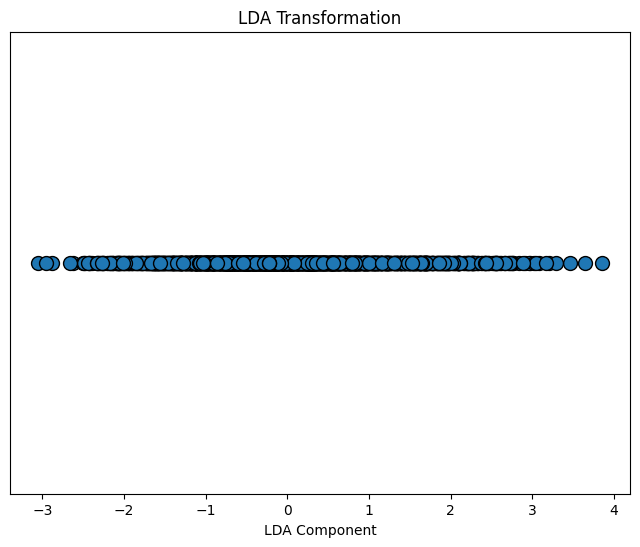

In [795]:
# Plotting LDA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_new, [0] * len(X_new), cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('LDA Component')
plt.title('LDA Transformation')
plt.yticks([]) # since this is only 1-Dimensional, we do not need y-axis
plt.show()

>Our entire dataset has been projected by a single discriminant on one-dimensional space, we can now analyse the changes in the model performance after applying LDA.

In [796]:
# Create a pipeline to sequentially apply LDA and then the classifier
pipeline = Pipeline([('lda', lda), ('classifier', model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('lda', LinearDiscriminantAnalysis(n_components=1)),
                ('classifier', RandomForestClassifier())])

In [797]:
y_pred = pipeline.predict(X_test)
y_pred[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [798]:
# Evaluating the accuracy
accuracy_lda =accuracy_score(y_test, y_pred)*100
print(f"Accuracy of our model on the original dataset : {accuracy_lda:.4f} %")

Accuracy of our model on the original dataset : 57.1782 %


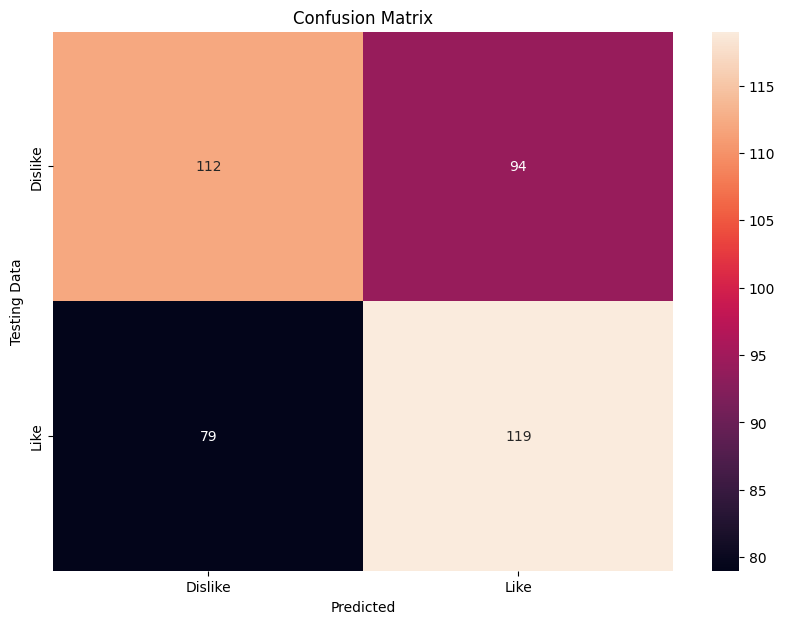

In [799]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=['Dislike','Like'], yticklabels=['Dislike','Like'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Testing Data', fontsize=10)
plt.show()

>**INFERENCE**: On applying LDA, True Positives and True Negatives have decreased as compared to Original Dataset

In [800]:
# Calculating the precision, recall and f1-score
precision_lda = precision_score(y_test, y_pred)
recall_lda = recall_score(y_test, y_pred)
f1_score_lda = f1_score(y_test, y_pred)

In [801]:
# Plotting the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.54      0.56       206
           1       0.56      0.60      0.58       198

    accuracy                           0.57       404
   macro avg       0.57      0.57      0.57       404
weighted avg       0.57      0.57      0.57       404



###Comparing results of LDA with Original Dataset

In [802]:
# Comparing model performance on Original and Dimensionally Reduced Datasets
lda_results_dict = {
    "Original": [accuracy_org/100, precision_org, recall_org, f1_score_org],
    "LDA": [accuracy_lda/100, precision_lda, recall_lda, f1_score_lda]
}

lda_results_df = pd.DataFrame.from_dict(lda_results_dict, orient="index", columns=["accuracy", "precision", "recall", "f1_score"])
lda_results_df

,accuracy,precision,recall,f1_score
Original,0.745050,0.716895,0.792929,0.752998
LDA,0.571782,0.558685,0.601010,0.579075


>**INFERENCE**: There is a significant drop in the above classification metrics after projecting our dataset on a 1-Dimensional Space which means a lot of information has been lost because of projecting all the features on a single discriminant.  Essentially, by compressing the data into fewer dimensions, you lose some of the discriminatory power of the original features, which can negatively impact the model's ability to distinguish between classes accurately. Thus, it's important to maintain a balance between dimensionality reduction for computational efficiency and retaining enough information for the model to make accurate predictions.

##Singular Value Decomposition (SVD)
Singular Value Decomposition (SVD) is a powerful matrix factorization technique used in machine learning. It decomposes a matrix into three constituent matrices, capturing the underlying structure and relationships within the data.

The SVD process identifies orthogonal vectors called singular vectors that represent the directions of maximum variance in the data. These singular vectors, along with singular values, allow for dimensionality reduction while preserving as much information as possible.


###SVD with `n_components=4`

In [803]:
# Apply Truncated SVD for 4 components
svd_4 = TruncatedSVD(n_components=4)
X_svd = svd_4.fit_transform(X)

In [804]:
# Creating a pipeline to sequentially apply SVD and then the classifier
pipeline = Pipeline([('svd', svd_4), ('classifier', model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('svd', TruncatedSVD(n_components=4)),
                ('classifier', RandomForestClassifier())])

In [805]:
y_pred = pipeline.predict(X_test)
y_pred[:10]

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [806]:
# Evaluating the accuracy
accuracy_svd_4 =accuracy_score(y_test, y_pred)*100
print(f"Accuracy of our model on SVD with n_components=4 : {accuracy_svd_4:.4f} %")

Accuracy of our model on SVD with n_components=4 : 58.1683 %


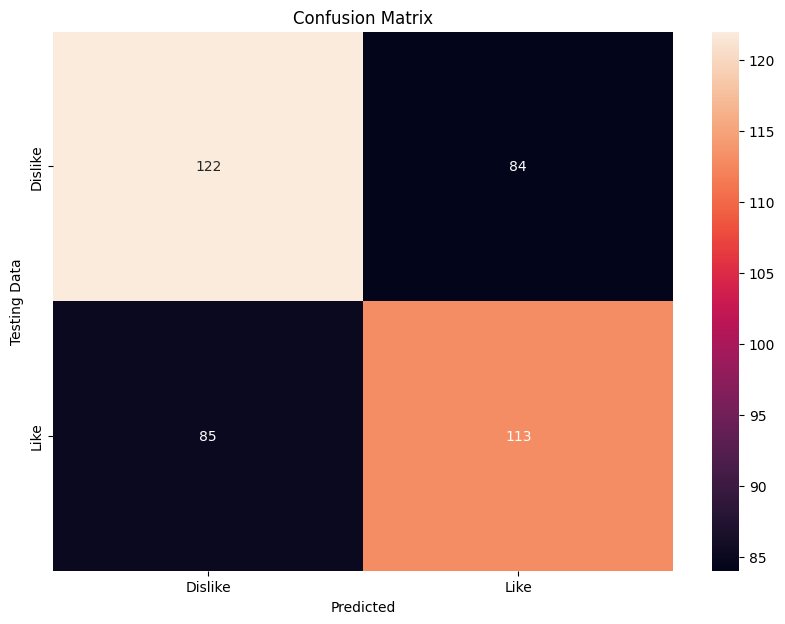

In [807]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=['Dislike','Like'], yticklabels=['Dislike','Like'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Testing Data', fontsize=10)
plt.show()

>**INFERENCE**: On applying SVD, True Positives and True Negatives have decreased as compared to Original Dataset

In [808]:
# Calculating the precision, recall and f1-score
precision_svd_4 = precision_score(y_test, y_pred)
recall_svd_4 = recall_score(y_test, y_pred)
f1_score_svd_4 = f1_score(y_test, y_pred)

In [809]:
# Plotting the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       206
           1       0.57      0.57      0.57       198

    accuracy                           0.58       404
   macro avg       0.58      0.58      0.58       404
weighted avg       0.58      0.58      0.58       404



>**INFERENCE**: There has been a drop in the accuracy of our model. Also, the precision, recall and f1-score have dropped too which means the overall model performance has suffered due to reducing the dimensions.

###SVD with `n_components=3`

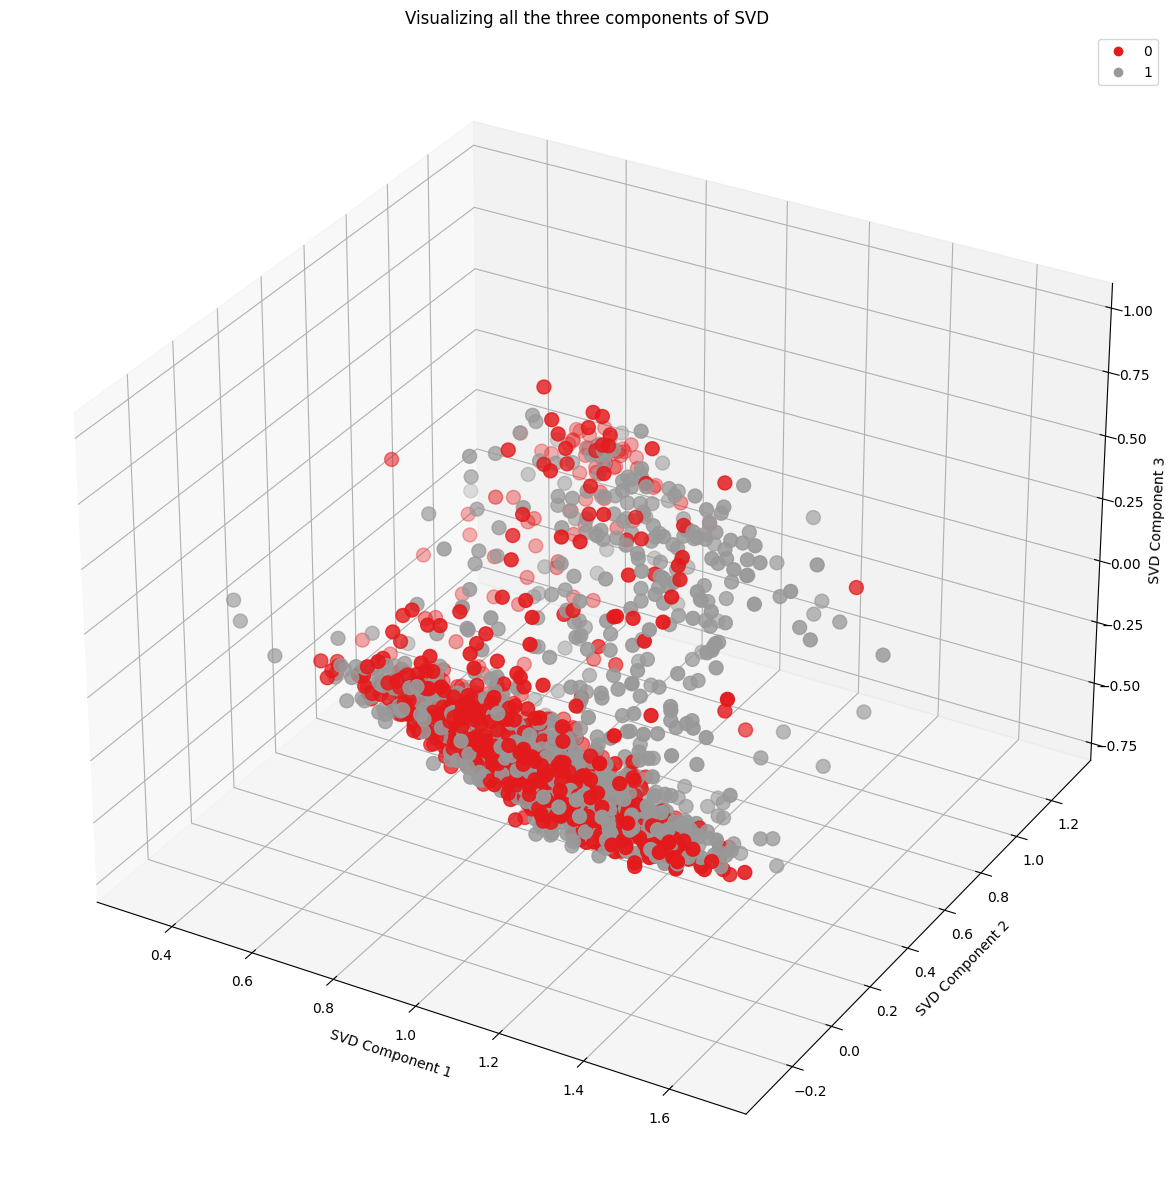

In [810]:
# Apply Truncated SVD for 3 components
svd_3 = TruncatedSVD(n_components=3)
X_svd = svd_3.fit_transform(X)

# Create a 3D scatter plot using Matplotlib
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], c=df['song_liked'], cmap='Set1', s=100)
ax.set_xlabel('SVD Component 1')
ax.set_ylabel('SVD Component 2')
ax.set_zlabel('SVD Component 3')
ax.set_title("Visualizing all the three components of SVD")
ax.legend(*scatter.legend_elements())
plt.show()

In [811]:
# Creating a pipeline to sequentially apply SVD and then the classifier
pipeline = Pipeline([('svd', svd_3), ('classifier', model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('svd', TruncatedSVD(n_components=3)),
                ('classifier', RandomForestClassifier())])

In [812]:
y_pred = pipeline.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [813]:
# Evaluating the accuracy
accuracy_svd_3 =accuracy_score(y_test, y_pred)*100
print(f"Accuracy of our model on SVD with n_components=3 : {accuracy_svd_3:.4f} %")

Accuracy of our model on SVD with n_components=3 : 59.9010 %


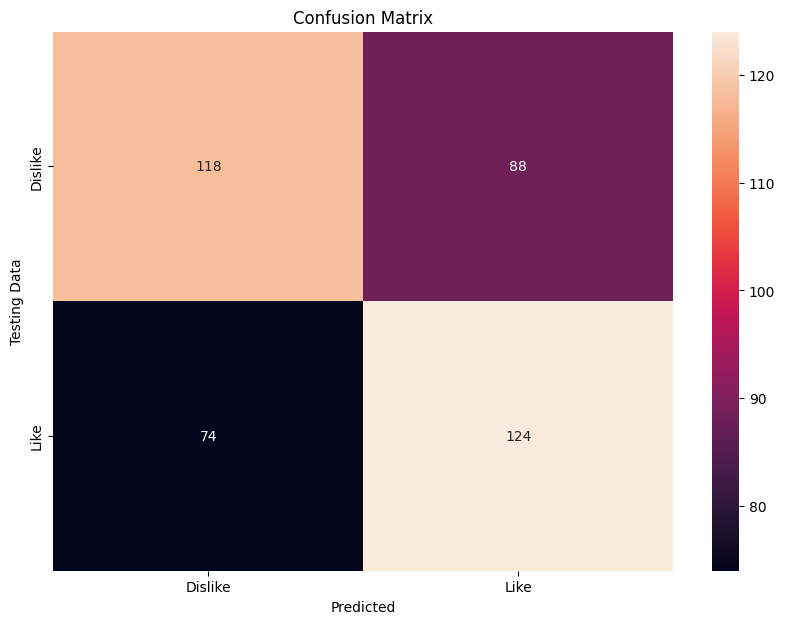

In [814]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=['Dislike','Like'], yticklabels=['Dislike','Like'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Testing Data', fontsize=10)
plt.show()

>**INFERENCE**: On applying SVD, True Positives and True Negatives have decreased as compared to Original Dataset

In [815]:
# Calculating the precision, recall and f1-score
precision_svd_3 = precision_score(y_test, y_pred)
recall_svd_3 = recall_score(y_test, y_pred)
f1_score_svd_3 = f1_score(y_test, y_pred)

In [816]:
# Plotting the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59       206
           1       0.58      0.63      0.60       198

    accuracy                           0.60       404
   macro avg       0.60      0.60      0.60       404
weighted avg       0.60      0.60      0.60       404



>**INFERENCE**: There has been a drop in the accuracy of our model. Also, the precision, recall and f1-score have dropped too which means the overall model performance has suffered due to reducing the dimensions.

###SVD with `n_components=2`

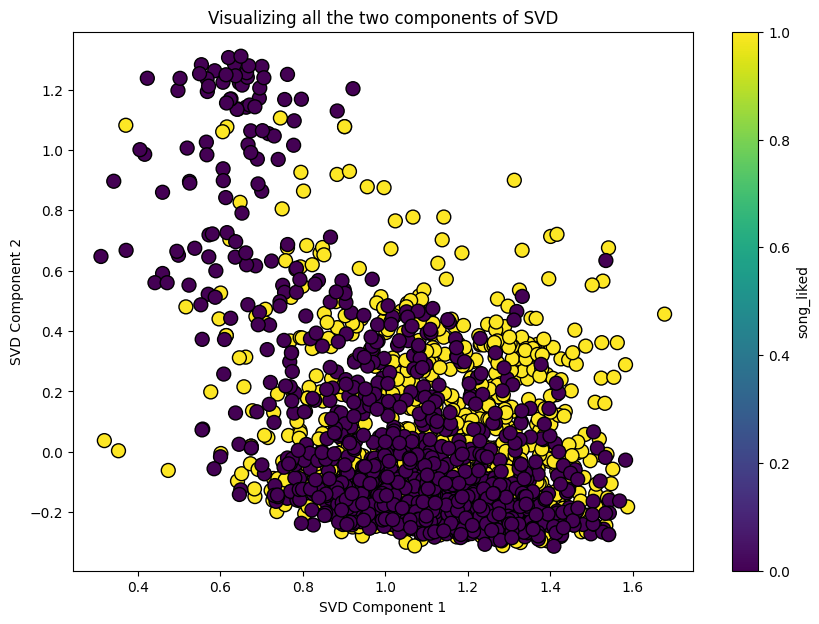

In [817]:
# Apply Truncated SVD for 2 components
svd_2 = TruncatedSVD(n_components=2)
X_svd = svd_2.fit_transform(X)

# Plotting SVD-transformed data
plt.figure(figsize=(10, 7))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=df['song_liked'], cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('Visualizing all the two components of SVD')
plt.colorbar(label='song_liked')
plt.show()

In [818]:
# Creating a pipeline to sequentially apply SVD and then the classifier
pipeline = Pipeline([('svd', svd_2), ('classifier', model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('svd', TruncatedSVD()),
                ('classifier', RandomForestClassifier())])

In [819]:
y_pred = pipeline.predict(X_test)
y_pred[:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [820]:
# Evaluating the accuracy
accuracy_svd_2 =accuracy_score(y_test, y_pred)*100
print(f"Accuracy of our model on SVD with n_components=2 : {accuracy_svd_2:.4f} %")

Accuracy of our model on SVD with n_components=2 : 57.4257 %


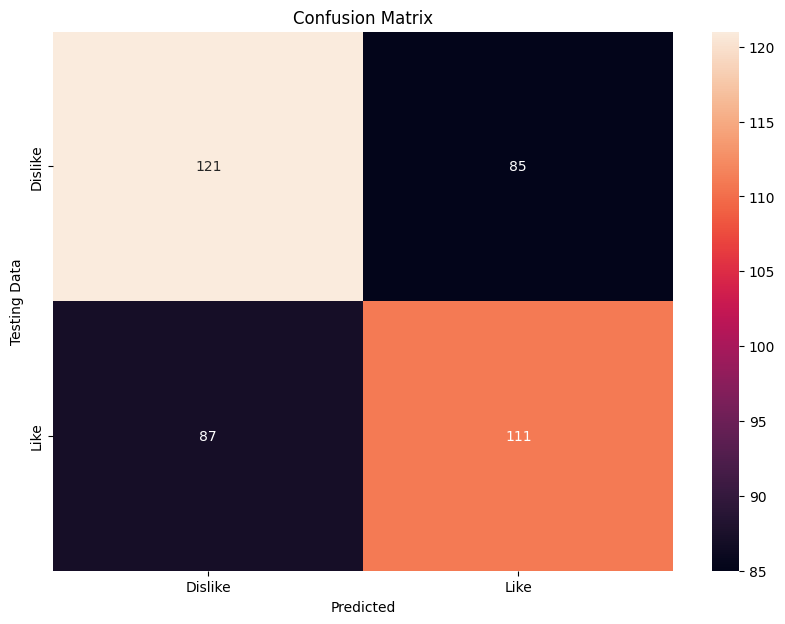

In [821]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=['Dislike','Like'], yticklabels=['Dislike','Like'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Testing Data', fontsize=10)
plt.show()

>**INFERENCE**: On applying SVD, True Positives and True Negatives have decreased as compared to Original Dataset

In [822]:
# Calculating the precision, recall and f1-score
precision_svd_2 = precision_score(y_test, y_pred)
recall_svd_2 = recall_score(y_test, y_pred)
f1_score_svd_2 = f1_score(y_test, y_pred)

In [823]:
# Plotting the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58       206
           1       0.57      0.56      0.56       198

    accuracy                           0.57       404
   macro avg       0.57      0.57      0.57       404
weighted avg       0.57      0.57      0.57       404



>**INFERENCE**: There has been a drop in the accuracy of our model. Also, the precision, recall and f1-score have dropped too which means the overall model performance has suffered due to reducing the dimensions.

###Comparing results of SVD with Original Dataset

In [824]:
# Comparing model performance on Original and Dimensionally Reduced Datasets
svd_results_dict = {
    "Original": [accuracy_org/100, precision_org, recall_org, f1_score_org],
    "SVD-4": [accuracy_svd_4/100, precision_svd_4, recall_pca_4, f1_score_svd_4],
    "SVD-3": [accuracy_svd_3/100, precision_svd_3, recall_pca_3, f1_score_svd_3],
    "SVD-2": [accuracy_svd_2/100, precision_svd_2, recall_pca_2, f1_score_svd_2]
}

svd_results_df = pd.DataFrame.from_dict(svd_results_dict, orient="index", columns=["accuracy", "precision", "recall", "f1_score"])
svd_results_df

,accuracy,precision,recall,f1_score
Original,0.745050,0.716895,0.792929,0.752998
SVD-4,0.581683,0.573604,0.646465,0.572152
SVD-3,0.599010,0.584906,0.595960,0.604878
SVD-2,0.574257,0.566327,0.570707,0.563452


>**INFERENCE**: After applying SVD on the original dataset, even though the model performance suffered, SVD with n_components=4,3 and 2, they all have very similar model performances, thus reducing the components from 4 to 2 did not make much difference which is good as we can save up on even more computational power while retaining almost the same amount of information.

##Comparing results of all dimensionality reduction techniques

In [825]:
# Combining all the results of each of the dimensionality reduction technique to a single dataframe
combined_results_dict = {
    "Original": [accuracy_org/100, precision_org, recall_org, f1_score_org],
    "PC-4": [accuracy_pca_4/100, precision_pca_4, recall_pca_4, f1_score_pca_4],
    "PC-3": [accuracy_pca_3/100, precision_pca_3, recall_pca_3, f1_score_pca_3],
    "PC-2": [accuracy_pca_2/100, precision_pca_2, recall_pca_2, f1_score_pca_2],
    "LDA": [accuracy_lda/100, precision_lda, recall_lda, f1_score_lda],
    "SVD-4": [accuracy_svd_4/100, precision_svd_4, recall_pca_4, f1_score_svd_4],
    "SVD-3": [accuracy_svd_3/100, precision_svd_3, recall_pca_3, f1_score_svd_3],
    "SVD-2": [accuracy_svd_2/100, precision_svd_2, recall_pca_2, f1_score_svd_2]
}

combined_results_df = pd.DataFrame.from_dict(combined_results_dict, orient="index",
                                             columns=["accuracy", "precision", "recall", "f1-score"])

# Sorting the combined results in the descending order of accuracy
# to see which dimensionality reduction technique works best for our dataset
combined_results_df = combined_results_df.sort_values(by="accuracy", ascending=False)
combined_results_df

,accuracy,precision,recall,f1-score
Original,0.745050,0.716895,0.792929,0.752998
PC-4,0.641089,0.630542,0.646465,0.638404
SVD-3,0.599010,0.584906,0.595960,0.604878
SVD-4,0.581683,0.573604,0.646465,0.572152
PC-3,0.574257,0.561905,0.595960,0.578431
SVD-2,0.574257,0.566327,0.570707,0.563452
LDA,0.571782,0.558685,0.601010,0.579075
PC-2,0.569307,0.559406,0.570707,0.565000


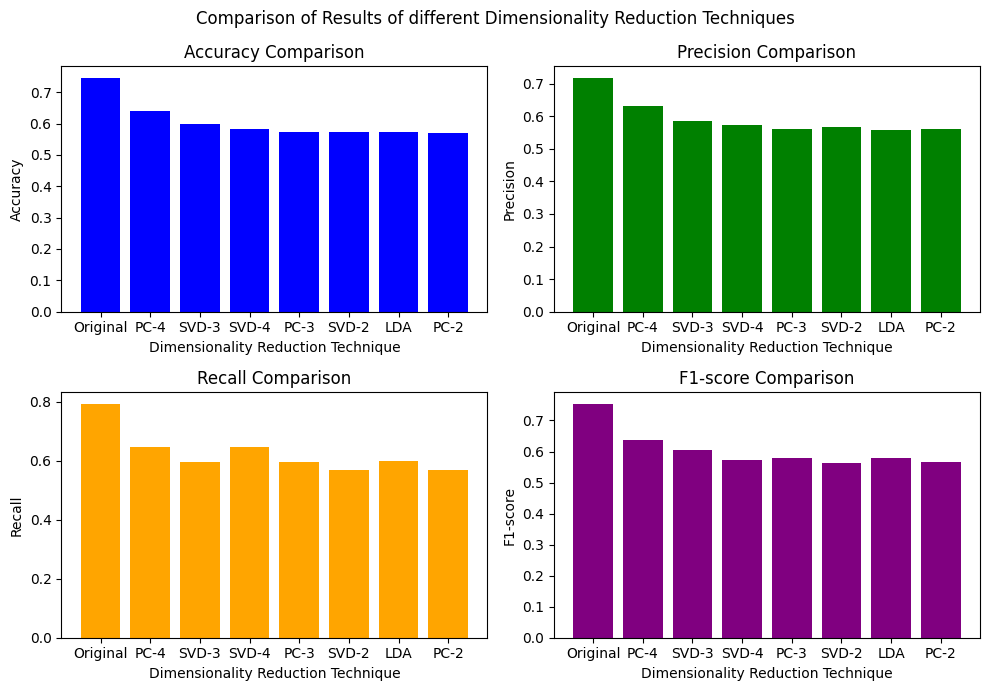

In [826]:
# Plotting the above results
plt.figure(figsize=(10, 7))

# Bar plot for accuracy
plt.subplot(221)
plt.bar(combined_results_df.index, combined_results_df['accuracy'], color='blue')
plt.xlabel('Dimensionality Reduction Technique')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Bar plot for precision
plt.subplot(222)
plt.bar(combined_results_df.index, combined_results_df['precision'], color='green')
plt.xlabel('Dimensionality Reduction Technique')
plt.ylabel('Precision')
plt.title('Precision Comparison')

# Bar plot for recall
plt.subplot(223)
plt.bar(combined_results_df.index, combined_results_df['recall'], color='orange')
plt.xlabel('Dimensionality Reduction Technique')
plt.ylabel('Recall')
plt.title('Recall Comparison')

# Bar plot for F1-score
plt.subplot(224)
plt.bar(combined_results_df.index, combined_results_df['f1-score'], color='purple')
plt.xlabel('Dimensionality Reduction Technique')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')

plt.suptitle("Comparison of Results of different Dimensionality Reduction Techniques")
plt.tight_layout()
plt.show()

>In the above plots, the numbers 2,3,4 represent the number of components for the corresponding dimensionality reduction technique and for LDA, number of components is 1 hence it is not specified in the xlabels

#Conclusion
After performing so many dimensionality reduction techniques and evaluating all of them on a classification model to predict if the person liked a particular song or not, following are the conclusions:

* PCA with n_components=4 is the best dimensionality reduction technique for our dataset.
* Also, PCA with n_components=3 and SVD with n_components=3 are very close to PCA with n_components=4, so they can be used as well.
* However, PCA with n_components=2 showed poor results with respect to our dataset hence it retained the least amount of information about the original features of the dataset.
* LDA though projected the entire dataset on a 1-Dimensional space, it still out-performed PCA with n_components=2. This shows how using LDA, we managed to project the entire data into a single component and get better results than PCA with 2 components, essentially, saving even more computational power while retaining more information than PCA with 2 components.
* PCA (with 3 components) and SVD (with 4 components) techniques showed relatively similar precision, recall  scores, and thus similar f1-scores, with PCA slightly higher than SVD in most cases.
* While dimensionality reduction techniques like PCA and SVD can help reduce computational complexity and improve efficiency, they may lead to a trade-off in model performance compared to the model performance on the Original Dataset.
